<a href="https://colab.research.google.com/github/prnmshr/hatespeech-detect/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import re

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   count                     24783 non-null  int64 
 1   hate_speech_count         24783 non-null  int64 
 2   offensive_language_count  24783 non-null  int64 
 3   neither_count             24783 non-null  int64 
 4   class                     24783 non-null  int64 
 5   tweet                     24783 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.1+ MB


(24783, 6)

<Axes: >

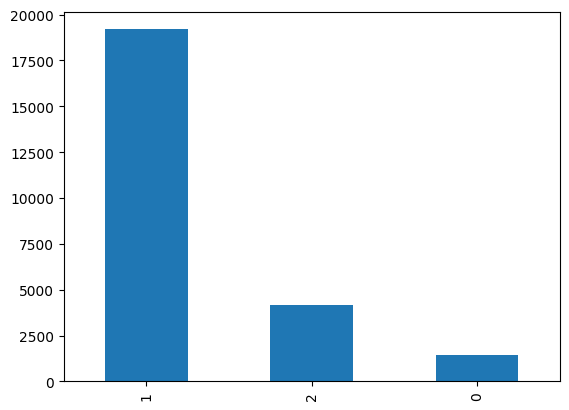

In [ ]:
df['class'].value_counts().plot(kind='bar')


<Axes: >

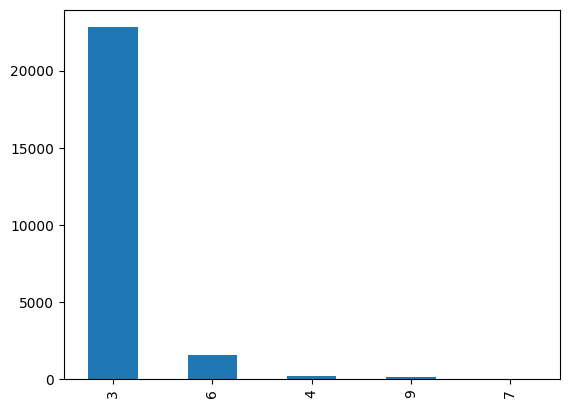

In [ ]:
df['count'].value_counts().plot(kind='bar')

<Axes: >

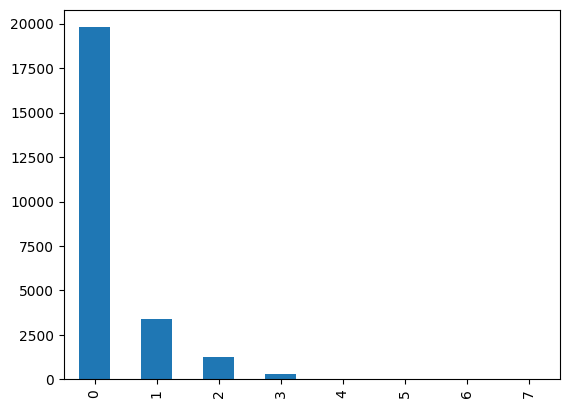

In [ ]:
df['hate_speech_count'].value_counts().plot(kind='bar')

<Axes: >

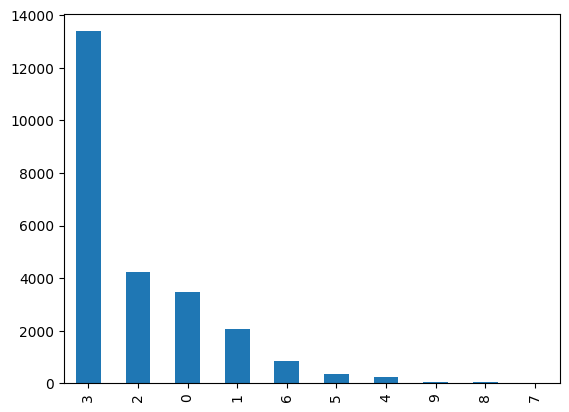

In [ ]:
df['offensive_language_count'].value_counts().plot(kind='bar')

<Axes: >

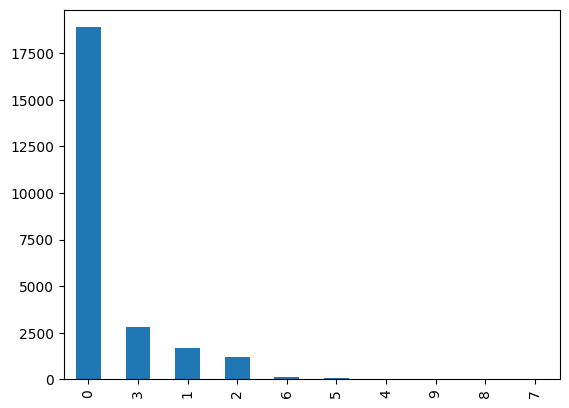

In [ ]:
df['neither_count'].value_counts().plot(kind='bar')

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
stopword_set = stopwords.words('english')
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopword_lemmatize(sent):

    sent = word_tokenize(sent)
    new_sent = ''
    for word in sent:
        if word not in stopword_set:

            new_sent+=word+' '
    return new_sent

In [ ]:
def clean_tweet(x):
    pattern = r'@\w*\b'
    no_pattern = r'&#\w*\b'
    x = re.sub(no_pattern,'',x)
    x = re.sub(pattern,'',x)
    x = x.replace('RT ','')
    x = x.replace('NFN ','')
    x = re.sub('|!|:|"|;|\'|\.|','',x)
    return x

In [ ]:
df['tweet'] = df['tweet'].apply(clean_tweet)

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df['tweet'] = df['tweet'].apply(remove_stopword_lemmatize)

In [ ]:
labels = df['class']
df.drop('class',axis=1,inplace=True)

In [ ]:
df['tweet']

0        As woman shouldnt complain cleaning house & am...
1        boy dats coldtyga dwn bad cuffin dat hoe 1st p...
2        Dawg You ever fuck bitch start cry ? You confu...
3                                        look like tranny 
4        The shit hear might true might faker bitch tol...
                               ...                        
24778    yous muthaf * * * lie right His TL trash Now ,...
24779    youve gone broke wrong heart baby , drove redn...
24780    young buck wan na eat dat nigguh like I aint f...
24781                   youu got wild bitches tellin lies 
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#TOKENIZER
tokenizer = Tokenizer(num_words=250, oov_token='x')
tokenizer.fit_on_texts(df)

sekuens_train = tokenizer.texts_to_sequences(df)

padded_train = pad_sequences(sekuens_train, maxlen=20)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test = train_test_split(df,labels,test_size=0.2)

In [ ]:
import tensorflow as tf

#SEQUENCE
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(250, 16, input_length=20),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
def get_max_len(t):
    max_len = 0
    total_words = []
    for i in t:
        max_len = max(max_len,len(i.split(' ')))
        total_words.extend(i.split(' '))
    return max_len,len(set(total_words))

max_len,total_words = get_max_len(list(df['tweet']))
max_len,total_words

(41, 30481)

In [ ]:
from tensorflow.keras.layers import TextVectorization,Embedding
import tensorflow
tensorflow.random.set_seed(42)

text_vector = TextVectorization(max_tokens=total_words,
                                output_mode = 'int',
                                output_sequence_length = max_len,
                                split = 'whitespace',
                                standardize = 'lower_and_strip_punctuation')

In [ ]:
text_embedding = Embedding(input_dim = total_words,
                           input_length = max_len,
                           output_dim=128)

In [ ]:
text_vector.adapt(df['tweet'])

In [ ]:
text_embedding(text_vector([clean_tweet(df.loc[159,'tweet'])]))

<tf.Tensor: shape=(1, 41, 128), dtype=float32, numpy=
array([[[-0.02860285,  0.04430636,  0.03259059, ..., -0.0311314 ,
          0.01583177,  0.02681186],
        [-0.02860285,  0.04430636,  0.03259059, ..., -0.0311314 ,
          0.01583177,  0.02681186],
        [-0.0249643 ,  0.03162637, -0.03901081, ..., -0.00028535,
         -0.02631313,  0.01923234],
        ...,
        [-0.02631048, -0.00855118,  0.00509892, ..., -0.01246698,
          0.03297244, -0.04327922],
        [-0.02631048, -0.00855118,  0.00509892, ..., -0.01246698,
          0.03297244, -0.04327922],
        [-0.02631048, -0.00855118,  0.00509892, ..., -0.01246698,
          0.03297244, -0.04327922]]], dtype=float32)>

In [ ]:
x_tweet = x_train['tweet']
y_tweet = y_train['tweet']

In [ ]:
from tensorflow.keras.layers import LSTM,Input,Dense,Dropout

input = Input(shape=(1,),dtype='string')
x = text_vector(input)
x = text_embedding(x)
x = LSTM(32,activation='tanh')(x)
x = Dropout(0.5)(x)
x = Dense(16,activation='tanh')(x)
x = Dropout(0.5)(x)
output = Dense(3,activation='softmax')(x)

model = tensorflow.keras.Model(input,output,name='LSTM_model')

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "LSTM_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_5 (Text  (None, 41)                0         
 Vectorization)                                                  
                                                                 
 embedding_12 (Embedding)    (None, 41, 128)           3901568   
                                                                 
 lstm_5 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_6 (Dropout)         (None, 32)                0         
                                                                 
 dense_20 (Dense)            (None, 16)                528       
                                                        

In [ ]:
model_history = model.fit(x_train['tweet'],x_test,epochs=10,batch_size=32,validation_data=(y_train['tweet'],y_test))

Epoch 1/10
620/620 [==============================] - 46s 70ms/step - loss: 0.6199 - accuracy: 0.7916 - val_loss: 0.5497 - val_accuracy: 0.8007
Epoch 2/10
620/620 [==============================] - 40s 65ms/step - loss: 0.4436 - accuracy: 0.8466 - val_loss: 0.4138 - val_accuracy: 0.8608
Epoch 3/10
620/620 [==============================] - 40s 64ms/step - loss: 0.3656 - accuracy: 0.8885 - val_loss: 0.3650 - val_accuracy: 0.8699
Epoch 4/10
620/620 [==============================] - 40s 65ms/step - loss: 0.2648 - accuracy: 0.9195 - val_loss: 0.3909 - val_accuracy: 0.8771
Epoch 5/10
620/620 [==============================] - 40s 64ms/step - loss: 0.2138 - accuracy: 0.9301 - val_loss: 0.4332 - val_accuracy: 0.8808
Epoch 6/10
620/620 [==============================] - 42s 69ms/step - loss: 0.1907 - accuracy: 0.9387 - val_loss: 0.4988 - val_accuracy: 0.8755
Epoch 7/10
620/620 [==============================] - 40s 65ms/step - loss: 0.1835 - accuracy: 0.9415 - val_loss: 0.4921 - val_accuracy:

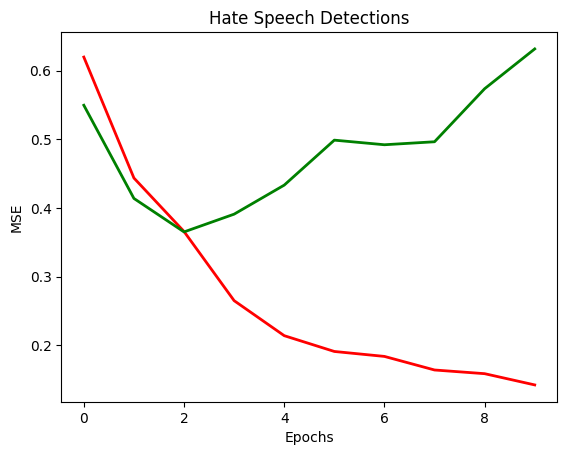

In [ ]:
hist = model.history.history
plt.plot(hist['loss'],'r',linewidth=2, label='Training loss')
plt.plot(hist['val_loss'], 'g',linewidth=2, label='Validation loss')
plt.title('Hate Speech Detections')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()